In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# adata = sc.read_mtx('data/gene_sorted-matrix.mtx')
# adata = adata.T

In [9]:
labels = pd.read_csv('data/barcodes.tsv', header=None, sep='\t')
genes = pd.read_csv('data/genes.tsv', header=None, sep = '\t')

print("Adata shape: ", adata.shape)
print("Labels shape: ", labels.shape)
print("Genes shape: ", genes.shape)

Adata shape:  (98047, 19712)
Labels shape:  (98047, 1)
Genes shape:  (19712, 2)


In [ ]:
# adata.obs['labels'] = labels.values.flatten() 
# adata.obs_names = labels[0]
# adata.obs['labels'] = labels[0]
# adata.columns = genes[0]

# print(genes[0][1])


# # 3. Assign gene names and cell labels to the AnnData object
# adata.var_names = genes.iloc[:, 0].values  # Assign the gene names (first column of genes.csv)
# adata.obs_names = labels.index.values  # Assign cell names (or row indices in the MTX file)

# # 4. Add the labels as metadata to `adata.obs`
# adata.obs['label'] = labels.iloc[:, 0].values  # Add labels to the AnnData object

c:\Users\theop\miniconda3\envs\nn_project_env\Lib\site-packages\anndata\_core\anndata.py:822: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  names = self._prep_dim_index(names, "obs")


In [23]:
# Step 3: Preprocessing (optional but recommended)
# Normalize the data (you can adjust this step based on your dataset)
sc.pp.normalize_total(adata, target_sum=1e4)  # Normalize each cell to have the same total count
sc.pp.log1p(adata)  # Log transform the data

In [24]:
# Step 4: Perform K-means clustering
num_clusters = 14  # You can set the number of clusters based on your problem
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
adata.obs['kmeans_labels'] = kmeans.fit_predict(adata.X)  # Assign KMeans labels to adata

In [25]:
# Step 5: Visualize the clustering (using UMAP for visualization)
sc.pp.neighbors(adata)
sc.tl.umap(adata)  # Run UMAP for dimensionality reduction

<Figure size 800x600 with 0 Axes>

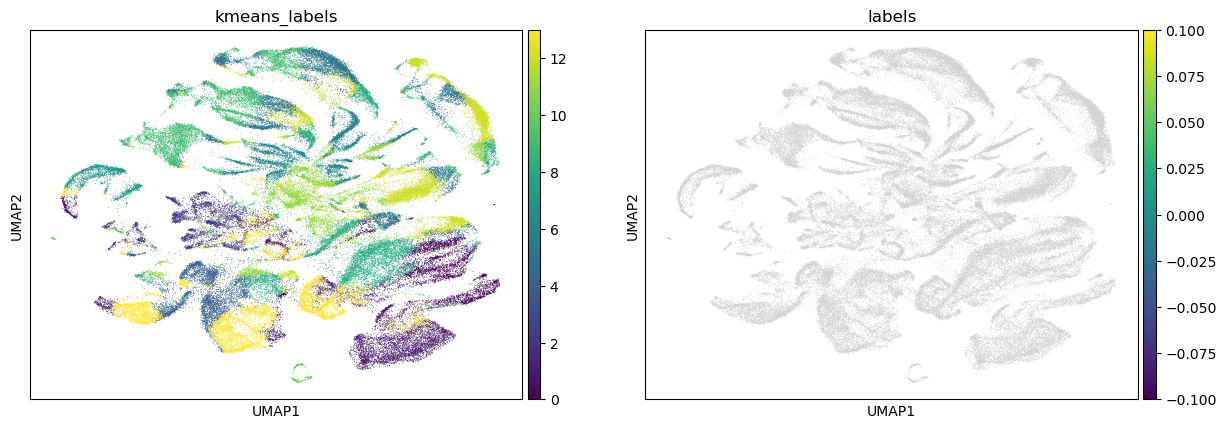

KMeans Clusters:
 kmeans_labels
5     12503
8     10845
9     10796
12    10582
13    10055
1      9134
11     8278
4      6471
6      6312
0      6047
2      4370
7      2318
10      328
3         8
Name: count, dtype: int64
True Labels:
 Series([], Name: count, dtype: int64)


In [ ]:
# adata.var_names = labels[0]
# adata.rows = labels[0]

# Plot the clustering result (UMAP visualization)
plt.figure(figsize=(8, 6))
sc.pl.umap(adata, color=['kmeans_labels', 'labels'], legend_loc='on data')
plt.show()

# Optionally, you can compare the KMeans labels with the ground truth labels
print("KMeans Clusters:\n", adata.obs['kmeans_labels'].value_counts())
print("True Labels:\n", adata.obs['labels'].value_counts())